In [25]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 랜덤하게 각 주식의 가격 100개의 데이터 생성
# 삼성 전자 주식 데이터
dates = pd.date_range(start='2021-01-04', periods =100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date':dates,'005930.KS': samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

print(samsung_df)

            005930.KS
Date                 
2021-01-04      82712
2021-01-05      89748
2021-01-06      83362
2021-01-07      87960
2021-01-08      82525
...               ...
2021-04-09      84498
2021-04-10      80180
2021-04-11      86742
2021-04-12      87109
2021-04-13      87219

[100 rows x 1 columns]


In [22]:
# LG 전자 주식 데이터
lg_prices = [random.randint(140000,160000) for _ in range(100)]
lg_data = {'Date':dates,'066570.KS': lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

print(lg_df)

            066570.KS
Date                 
2021-01-04     156897
2021-01-05     159741
2021-01-06     146263
2021-01-07     150959
2021-01-08     143737
...               ...
2021-04-09     155250
2021-04-10     148349
2021-04-11     149763
2021-04-12     152958
2021-04-13     145750

[100 rows x 1 columns]


In [23]:
# 두 데이터프레임을 합쳐서 하나의 데이터프레임으로 만들기
df = pd.concat([samsung_df, lg_df], axis = 1)
df = df.loc[:, ['005930.KS','066570.KS']]
df.columns =['Samsung','LG']
print(df)

            Samsung      LG
Date                       
2021-01-04    82712  156897
2021-01-05    89748  159741
2021-01-06    83362  146263
2021-01-07    87960  150959
2021-01-08    82525  143737
...             ...     ...
2021-04-09    84498  155250
2021-04-10    80180  148349
2021-04-11    86742  149763
2021-04-12    87109  152958
2021-04-13    87219  145750

[100 rows x 2 columns]


In [24]:
# 폴더 생성
os.makedirs("./data", exist_ok=True)
# csv 파일로 저장
df.to_csv("./data/stock_price.csv")

In [28]:
 # csv 파일 읽기
df= pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

print(df)

            Samsung      LG
Date                       
2021-01-04    82712  156897
2021-01-05    89748  159741
2021-01-06    83362  146263
2021-01-07    87960  150959
2021-01-08    82525  143737
...             ...     ...
2021-04-09    84498  155250
2021-04-10    80180  148349
2021-04-11    86742  149763
2021-04-12    87109  152958
2021-04-13    87219  145750

[100 rows x 2 columns]


In [29]:
# 두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.085066  0.018127
2021-01-06 -0.071155 -0.084374
2021-01-07  0.055157  0.032107
2021-01-08 -0.061789 -0.047841
...              ...       ...
2021-04-09  0.048479  0.029892
2021-04-10 -0.051102 -0.044451
2021-04-11  0.081841  0.009532
2021-04-12  0.004231  0.021334
2021-04-13  0.001263 -0.047124

[100 rows x 2 columns]


In [30]:
# 수익률 간의 상관계수 계산
corr_matrix = returns.corr()
print(corr_matrix)

          Samsung        LG
Samsung  1.000000  0.126416
LG       0.126416  1.000000


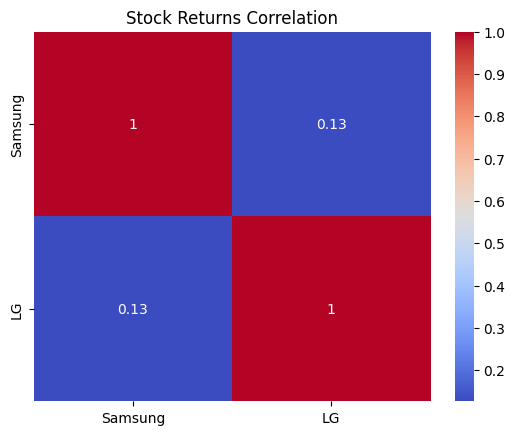

In [31]:
# 히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Returns Correlation')
plt.show()